#LOGISTIC REGRESION 

CLASSIFICATION PROBLEMS --> (YES/NO)(RIGHT/WRONG)
CLASSIFYIGING THE OUTPUT IN WHICH CATEGORY DOES IT FALL TO : RAINFALL PREIDICTION ETC.

LINEAR VS LOG 
CONTINUOUS   CATEGORISED


In [ ]:
!pip install scikit-learn --upgrade --quite


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --quite


In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pf 


In [ ]:
mnist= fetch_openml("mnist_784")
mnist= fetch_openml("mnist_784",version= 1,as_frame= False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

as_frame value when ture represents the variable x and y as pandas data frame 
and when false represents it as array

-> mnist= fetch_openml("mnist_784")
-> mnist= fetch_openml("mnist_784",version= 1,as_frame= False)
 
 use any if two 
 mnist_784 reoesents the dimensions of the one image present un mnist dat  28x28
 

In [ ]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x,y= mnist['data'], mnist['target']

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib 
import matplotlib.pyplot as plt


In [ ]:
dig= x[69696]
dig_img=dig.reshape(28,28)

image in data set is not stored as an image of the form 28x28 
it is stored as either a rwo or a column so we reshape it using reshape function 

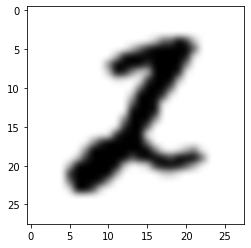

In [ ]:
plt.imshow(dig_img,cmap=matplotlib.cm.binary,interpolation='quadric')

interpolation -> resolution of image 

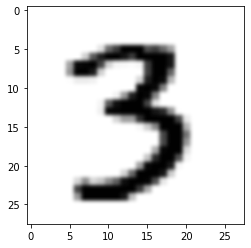

In [ ]:
dig1= x[10000]
dig1_img=dig1.reshape(28,28)
plt.imshow(dig1_img,cmap=matplotlib.cm.binary, interpolation='kaiser')

now we solit data into 600000:100000 out of 700000 

In [ ]:
x_t, x_tes=x[:60000],x[60000:]
y_t, y_tes=y[:60000],y[60000:]

In [ ]:
y_t

array(['5', '5', '3', ..., '3', '7', '9'], dtype=object)

In [ ]:
shuf_ind=np.random.permutation(60000)
x_t,y_t=x_t[shuf_ind],y_t[shuf_ind]


we shuffle the data set becasue we already have know what he value might be 

In [ ]:
y_t2=(y_t==3)
y_tes2=(y_tes==3)

In [ ]:
y_t=y_t.astype(np.int8)
y_tes=y_tes.astype(np.int8)


In [ ]:
y_t

array([5, 5, 3, ..., 3, 7, 9], dtype=int8)

In [ ]:
clf=LogisticRegression(tol=0.1)

In [ ]:
clf.fit(x_t,y_t2)   #we alwas fit the training inpiuts
examp=clf.predict([dig1])
print(examp)

[ True]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
clf.predict([dig])

array([False])

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
a= cross_val_score(clf,x_t,y_t2,cv=3,scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
a.mean()

0.971